# Technical Analysis
Technical analysis is a methodology widely used by traders and investors to analyze market data and forecast future price movements. It involves studying historical price patterns, trends, and market indicators to identify potential trading opportunities and assess the probability of price reversals or continuations.

In this notebook, we will cover a wide range of technical analysis concepts, tools, and strategies. We will explore popular technical indicators, chart patterns, and trend analysis methods. Additionally, we will delve into various techniques for evaluating market strength, measuring volatility, and identifying potential entry and exit points.

By mastering the art of technical analysis, you will gain a deeper understanding of market dynamics and develop the skills to interpret price charts effectively. Whether you are a novice trader or an experienced investor, this notebook will equip you with the knowledge and tools to make more informed trading decisions.

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime

#### S&P 500

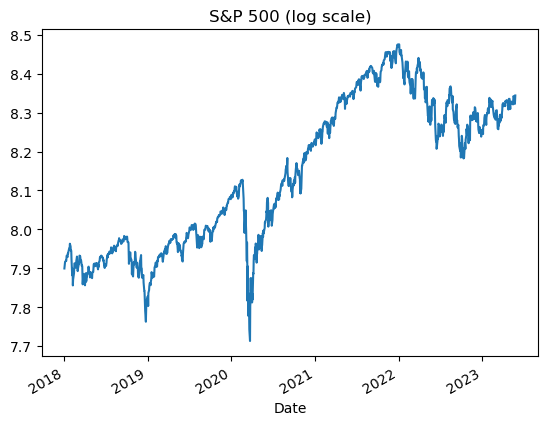

In [2]:
sp500 = yf.download('^GSPC','2018-01-01',datetime.today(), progress=False)['Close'].rename('S&P 500')
sp500.apply(lambda x: np.log(x)).plot(title='S&P 500 (log scale)');

## Moving Averages
Moving averages are a fundamental tool in technical analysis widely used by traders and analysts to understand price trends, identify potential support and resistance levels, and generate trading signals. A moving average is a calculation that helps smooth out price data by averaging the values over a specific period, providing a clearer picture of the underlying price trend.

##### Simple moving average

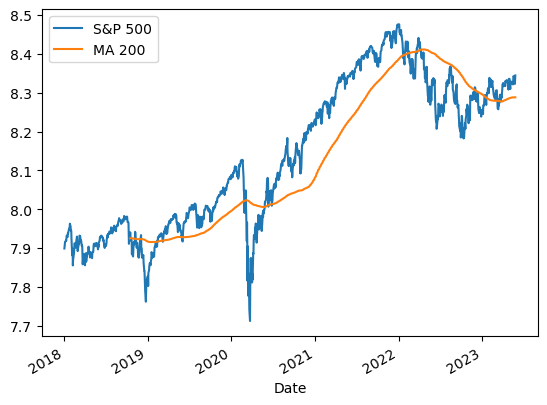

In [3]:
moving_average_200 = sp500.rolling(200).mean().rename('MA 200')
pd.concat([sp500, moving_average_200], axis=1).apply(lambda x: np.log(x)).plot();

##### Exponential moving average

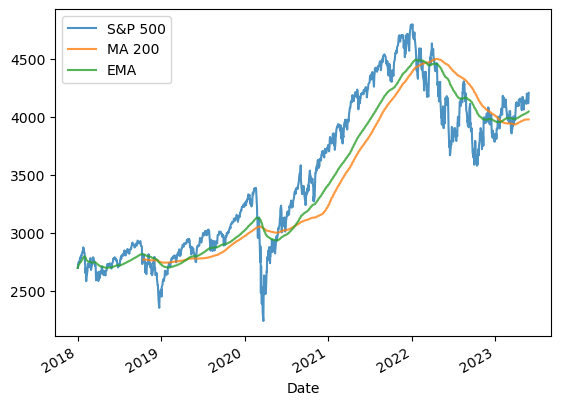

In [4]:
exp_moving_average_150 = sp500.ewm(span=150).mean().rename('EMA')
pd.concat([sp500, moving_average_200, exp_moving_average_150], axis=1).plot(alpha=0.8);

#### Implementing an MACD trading strategy

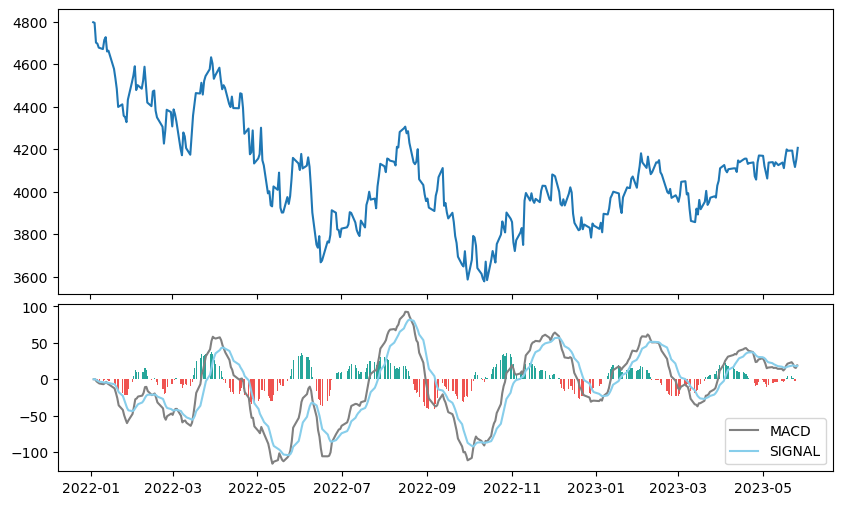

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

sp500 = sp500[sp500.index > pd.to_datetime('2022-01-01')]
ema26 = sp500.ewm(span = 26).mean()
ema12 = sp500.ewm(span = 12).mean()
macd = ema12 - ema26
signal_line = macd.ewm(span=9).mean()

ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

ax1.plot(sp500)
ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
ax2.plot(signal_line, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')
hist = macd - signal_line

for i in range(len(sp500)):
    if str(hist[i])[0] == '-':
        ax2.bar(sp500.index[i], hist[i], color = '#ef5350')
    else:
        ax2.bar(sp500.index[i], hist[i], color = '#26a69a')

plt.legend(loc = 'lower right');

Implement the strategy to buy whenever the signal crosses MACD goes above the signal and sell whenever the MACD moves below the signal

In [6]:
transactions = {'date': [], 'price': [], 'transaction': []}
current_signal = 0
for i in range(len(sp500)):
    m = macd[i]
    s = signal_line[i]
    if m > s and current_signal != 1:
        transactions['date'].append(sp500.index[i])
        transactions['price'].append(sp500[i])
        transactions['transaction'].append('buy')
        current_signal = 1
    elif m < s and current_signal != -1:
        transactions['date'].append(sp500.index[i])
        transactions['price'].append(sp500[i])
        transactions['transaction'].append('sell')
        current_signal = -1
transactions = pd.DataFrame(transactions)
transactions.tail()

,date,price,transaction
21,2023-03-21,4002.870117,buy
22,2023-04-25,4071.629883,sell
23,2023-05-18,4198.049805,buy
24,2023-05-24,4115.240234,sell
25,2023-05-26,4205.450195,buy


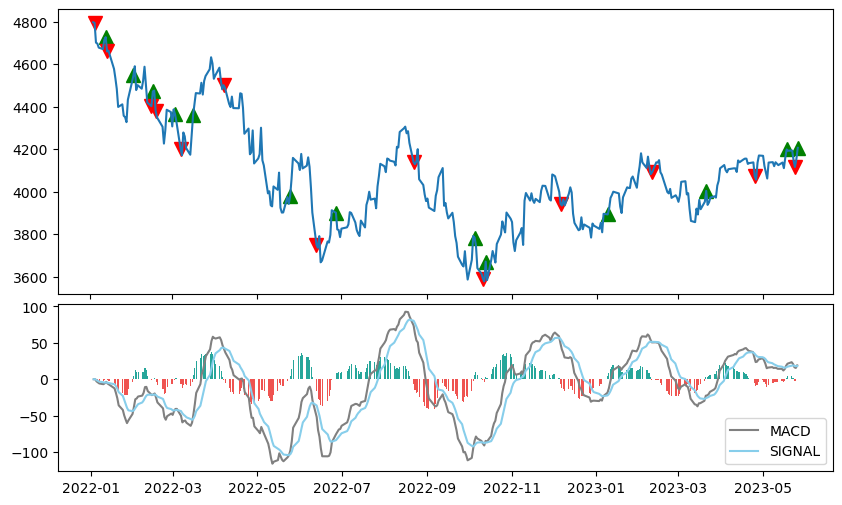

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

buys = transactions[transactions.transaction == 'buy'].copy()
sells = transactions[transactions.transaction == 'sell'].copy()


sp500 = sp500[sp500.index > pd.to_datetime('2022-01-01')]
ema26 = sp500.ewm(span = 26).mean()
ema12 = sp500.ewm(span = 12).mean()
macd = ema12 - ema26
signal_line = macd.ewm(span=9).mean()

ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)
ax1.plot(buys.date, buys.price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
ax1.plot(sells.date, sells.price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)

ax1.plot(sp500)
ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
ax2.plot(signal_line, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')
hist = macd - signal_line

for i in range(len(sp500)):
    if str(hist[i])[0] == '-':
        ax2.bar(sp500.index[i], hist[i], color = '#ef5350')
    else:
        ax2.bar(sp500.index[i], hist[i], color = '#26a69a')

plt.legend(loc = 'lower right');

#### Golden Cross

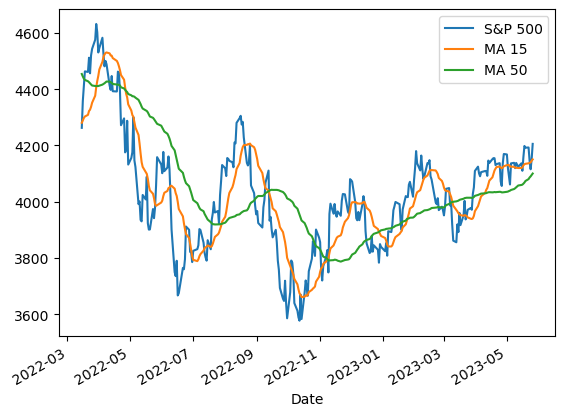

In [8]:
moving_average_15 = sp500.rolling(15).mean().rename('MA 15')
moving_average_50 = sp500.rolling(50).mean().rename('MA 50')
pd.concat([sp500, moving_average_15, moving_average_50], axis=1).dropna().plot();

### Relative strength index

In [9]:
import talib as ta

rsi = ta.RSI(sp500, timeperiod=14)

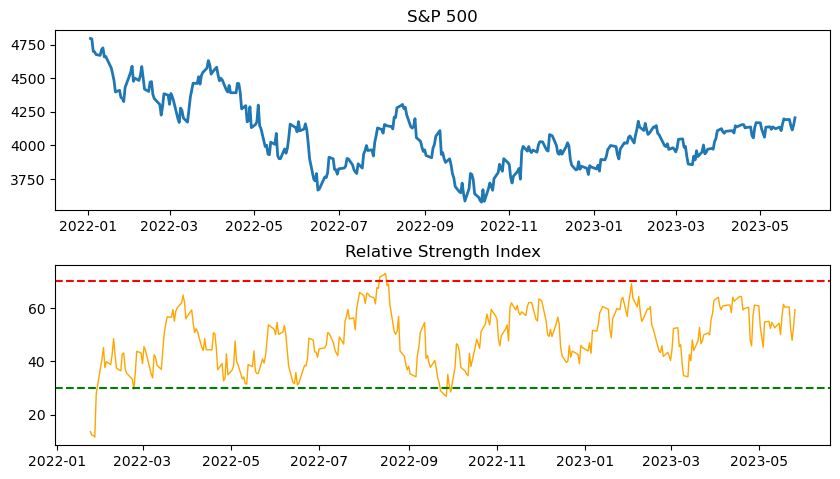

In [10]:
plt.figure(figsize=(10,6))
# Create two charts on the same figure.
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# First chart:
# Plot the closing price on the first chart
ax1.plot(sp500, linewidth=2)
ax1.set_title('S&P 500')

# Second chart
# Plot the RSI
ax2.set_title('Relative Strength Index')
ax2.plot(rsi, color='orange', linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax2.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax2.axhline(70, linestyle='--', linewidth=1.5, color='red');

### Mean reversion strategy

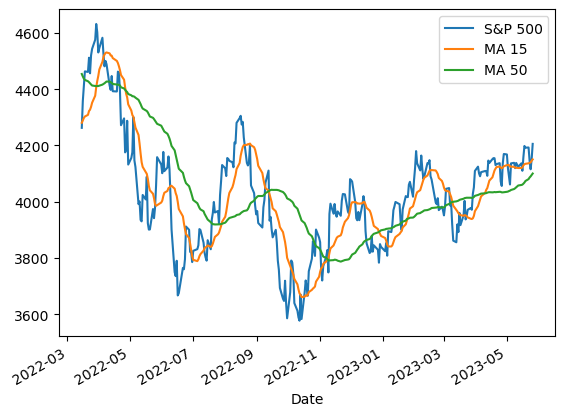

In [11]:
pd.concat([sp500, moving_average_15, moving_average_50], axis=1).dropna().plot();

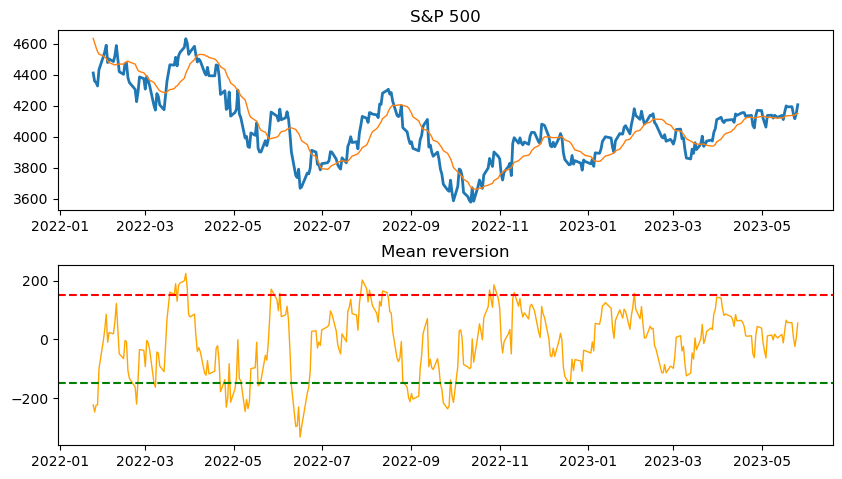

In [29]:
plt.figure(figsize=(10,6))
# Create two charts on the same figure.
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# First chart:
# Plot the closing price on the first chart
mask = ~moving_average_15.isna()
ax1.plot(sp500[mask], linewidth=2)
ax1.plot(moving_average_15[mask], linewidth=1)
ax1.set_title('S&P 500')

difference = sp500[mask] - moving_average_15[mask]
# Second chart
ax2.set_title('Mean reversion')
ax2.plot(difference, color='orange', linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Signal line
ax2.axhline(150, linestyle='--', linewidth=1.5, color='red');
ax2.axhline(-150, linestyle='--', linewidth=1.5, color='green');
